In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score,roc_curve, auc,classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the CSV File

data = pd.read_csv('/content/drive/MyDrive/DMPA_Project/Indian Liver Patient Dataset (ILPD).csv')

In [ ]:
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
col_names = ['Age','Gender','TB_total_bilirubin', 'DB_Direct_Bilirubin','Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'TP_Total_Protiens', 'ALB_Albumin', 'A/G_Ratio','Selector Field']
len(col_names)

11

In [ ]:
data.columns = col_names

In [ ]:
data.head()

,Age,Gender,TB_total_bilirubin,DB_Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,TP_Total_Protiens,ALB_Albumin,A/G_Ratio,Selector Field
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
data.isnull().sum() #check for missing values in each column and returns the count in each column

Age                                0
Gender                             0
TB_total_bilirubin                 0
DB_Direct_Bilirubin                0
Alkphos_Alkaline_Phosphotase       0
Sgpt_Alamine_Aminotransferase      0
Sgot_Aspartate_Aminotransferase    0
TP_Total_Protiens                  0
ALB_Albumin                        0
A/G_Ratio                          4
Selector Field                     0
dtype: int64

In [ ]:
data['A/G_Ratio'].fillna(round(data['A/G_Ratio'].mean(),2),inplace=True)

In [ ]:
data.isnull().sum()

Age                                0
Gender                             0
TB_total_bilirubin                 0
DB_Direct_Bilirubin                0
Alkphos_Alkaline_Phosphotase       0
Sgpt_Alamine_Aminotransferase      0
Sgot_Aspartate_Aminotransferase    0
TP_Total_Protiens                  0
ALB_Albumin                        0
A/G_Ratio                          0
Selector Field                     0
dtype: int64

In [ ]:
data['Selector Field'] = data['Selector Field'].map(lambda x:0 if x==2 else 1)  # 0-no disease, 1-disease

In [ ]:
data['Gender'] = data['Gender'].map(lambda x:0 if x=="Male" else 1)

In [ ]:
value_table = pd.crosstab(data['Gender'],data['Selector Field'])
value_table.columns = ["No Disease","Disease Present"]
value_table.index = ["Male","Female"]
print(value_table)

        No Disease  Disease Present
Male           117              324
Female          50               91


In [ ]:
#Split

X = data.drop('Selector Field',axis=1)
y = data['Selector Field']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [ ]:
Xtrain, Xtest, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

print(len(X_train))
print(len(y_train))

407
407


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.73      1.00      0.84       127

    accuracy                           0.73       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.53      0.73      0.61       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


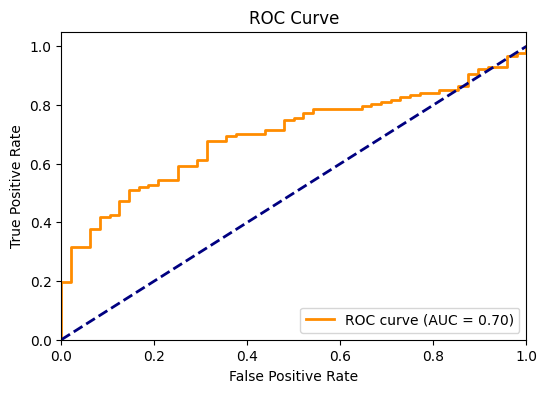

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = metrics.auc(fpr, tpr)  # Calculate AUC

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.text(0.1, 0.9, 'AUC = {:.2f}'.format(roc_auc), fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()


SVM(KFold)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=1)
svm_model = SVC(kernel='linear')
scores = cross_val_score(svm_model, X_Scaled, y, cv=kf, scoring='accuracy')
print("SVM Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {scores.mean():.2f}")

SVM Cross-Validation Scores:
[0.73809524 0.68674699 0.6746988  0.75903614 0.61445783 0.71084337
 0.80722892]
Mean Accuracy: 0.71


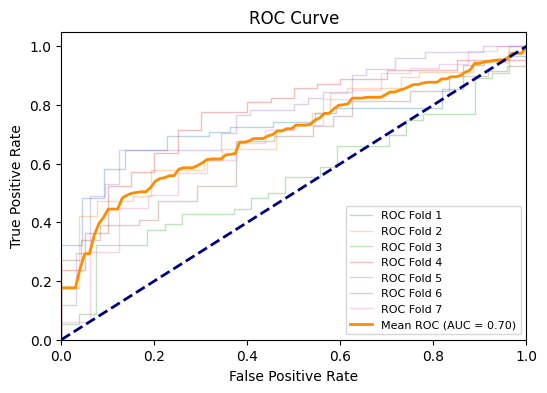

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=1)
svm_model = SVC(kernel='linear', probability=True)

mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
auc_list = []

plt.figure(figsize=(6, 4))

for fold, (train_idx, test_idx) in enumerate(kf.split(X_Scaled), start=1):
    X_train, X_test = X_Scaled[train_idx], X_Scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm_model.fit(X_train, y_train)
    y_prob = svm_model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    tpr_list.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {fold}')

    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)

mean_tpr = np.mean(tpr_list, axis=0)
mean_auc = np.mean(auc_list)

plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",fontsize=8)

#plt.text(0.1, 0.9, f'Mean AUC = {mean_auc:.2f}', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

Logistic Regression

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.40      0.25      0.31        16
           1       0.84      0.91      0.87        67

    accuracy                           0.78        83
   macro avg       0.62      0.58      0.59        83
weighted avg       0.75      0.78      0.76        83



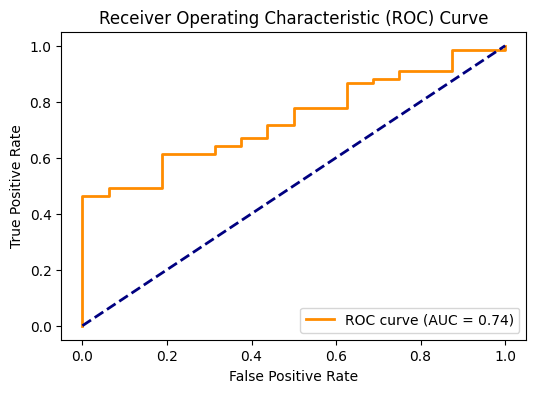

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)
roc_auc = roc_auc_score(y_test, y_prob_logistic)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic(K-Folds)

In [ ]:
logistic2_model = LogisticRegression(max_iter=1000)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic2_model, X_Scaled, y, cv=kfold, scoring='accuracy')
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold} Accuracy: {score:.2f}")
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Fold 1 Accuracy: 0.72
Fold 2 Accuracy: 0.73
Fold 3 Accuracy: 0.70
Fold 4 Accuracy: 0.75
Fold 5 Accuracy: 0.71
Mean Accuracy: 0.72


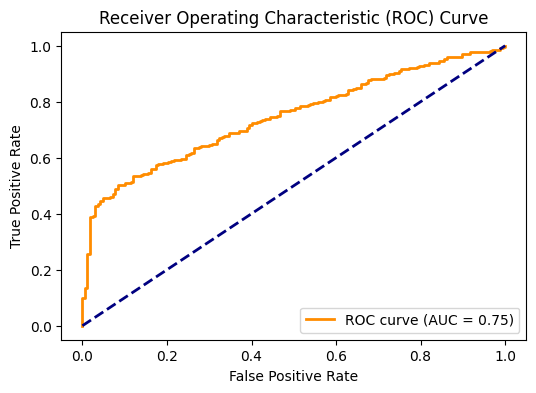

In [ ]:
logistic2_model = LogisticRegression(max_iter=1000)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

true_labels = []
predicted_probabilities = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_Scaled, y), start=1):
    X_train, X_test = X_Scaled[train_idx], X_Scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    logistic2_model.fit(X_train, y_train)

    y_prob_logistic = logistic2_model.predict_proba(X_test)[:, 1]

    true_labels.extend(y_test)
    predicted_probabilities.extend(y_prob_logistic)

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.33      0.44      0.38        16
           1       0.85      0.79      0.82        67

    accuracy                           0.72        83
   macro avg       0.59      0.61      0.60        83
weighted avg       0.75      0.72      0.74        83



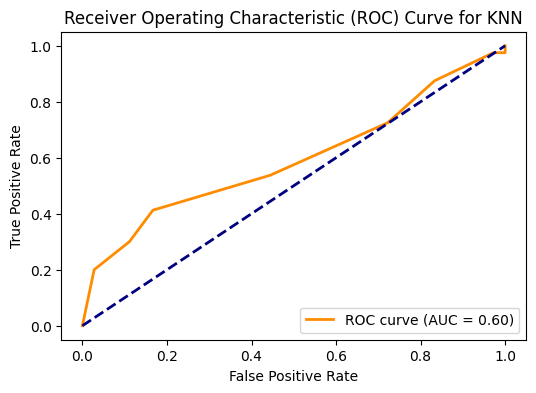

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

KNN(K-Folds)

In [ ]:
knn2_model = KNeighborsClassifier(n_neighbors=10)
kfold = KFold(n_splits=7, shuffle=True, random_state=42)
scores = cross_val_score(knn2_model, X_Scaled, y, cv=kfold, scoring='accuracy')
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold} Accuracy: {score:.2f}")
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Fold 1 Accuracy: 0.64
Fold 2 Accuracy: 0.66
Fold 3 Accuracy: 0.63
Fold 4 Accuracy: 0.67
Fold 5 Accuracy: 0.67
Fold 6 Accuracy: 0.59
Fold 7 Accuracy: 0.61
Mean Accuracy: 0.64


In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=10)
classification_reports = []
train_accuracies = []
test_accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_Scaled), start=1):
    X_train, X_test = X_Scaled[train_idx], X_Scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn_model.fit(X_train, y_train)
    y_pred_train = knn_model.predict(X_train)
    y_pred_test = knn_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Fold {fold} Training Accuracy: {train_accuracy:.2f}")
    print(f"Fold {fold} Test Accuracy: {test_accuracy:.2f}")
    print(f"Fold {fold} Classification Report:")
    print(classification_report(y_test, y_pred_test))

mean_train_accuracy = np.mean(train_accuracies)
mean_test_accuracy = np.mean(test_accuracies)
print(f"Mean Training Accuracy: {mean_train_accuracy:.2f}")
print(f"Mean Test Accuracy: {mean_test_accuracy:.2f}")


Fold 1 Training Accuracy: 0.74
Fold 1 Test Accuracy: 0.64
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38        29
           1       0.79      0.70      0.75        88

    accuracy                           0.64       117
   macro avg       0.56      0.58      0.56       117
weighted avg       0.68      0.64      0.66       117

Fold 2 Training Accuracy: 0.74
Fold 2 Test Accuracy: 0.63
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.24      0.27        33
           1       0.73      0.79      0.75        84

    accuracy                           0.63       117
   macro avg       0.52      0.51      0.51       117
weighted avg       0.61      0.63      0.62       117

Fold 3 Training Accuracy: 0.73
Fold 3 Test Accuracy: 0.65
Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.43    

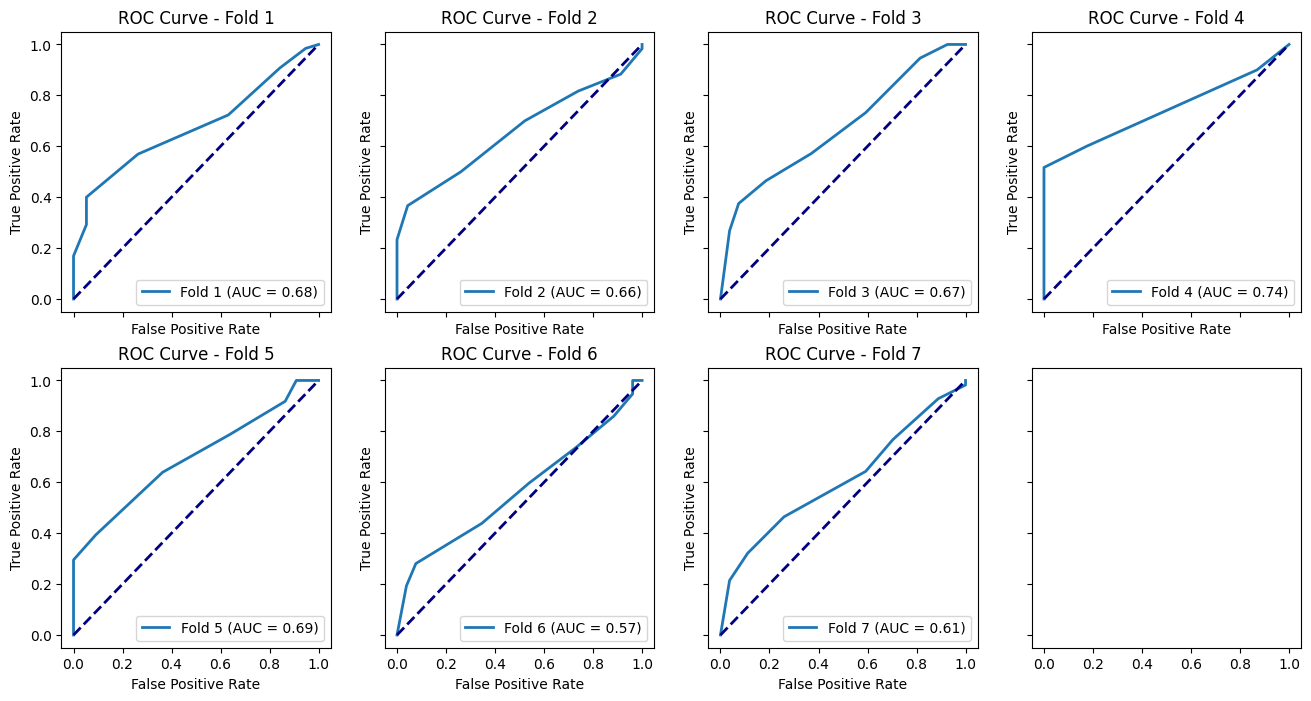

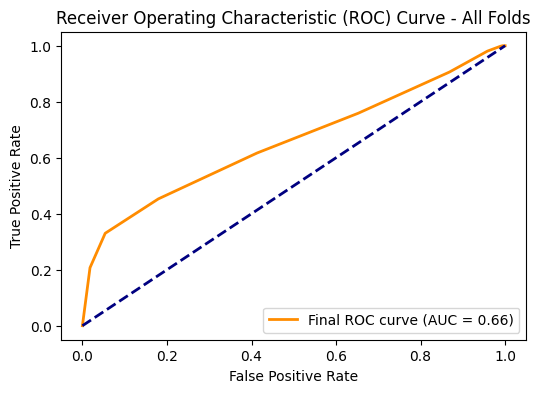

In [ ]:
knn2_model = KNeighborsClassifier(n_neighbors=10)

kfold = KFold(n_splits=7, shuffle=True, random_state=42)

true_labels_list = []
predicted_probabilities_list = []

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_Scaled, y), start=1):
    X_train, X_test = X_Scaled[train_idx], X_Scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn2_model.fit(X_train, y_train)

    y_prob_knn = knn2_model.predict_proba(X_test)[:, 1]

    true_labels_list.extend(y_test)
    predicted_probabilities_list.extend(y_prob_knn)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
    roc_auc = auc(fpr, tpr)

    axes[fold - 1].plot(fpr, tpr, lw=2, label=f'Fold {fold} (AUC = {roc_auc:.2f})')
    axes[fold - 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[fold - 1].set_title(f'ROC Curve - Fold {fold}')
    axes[fold - 1].set_xlabel('False Positive Rate')
    axes[fold - 1].set_ylabel('True Positive Rate')
    axes[fold - 1].legend(loc='lower right')

fpr_all, tpr_all, thresholds_all = roc_curve(true_labels_list, predicted_probabilities_list)
roc_auc_all = auc(fpr_all, tpr_all)

plt.figure(figsize=(6, 4))
plt.plot(fpr_all, tpr_all, color='darkorange', lw=2, label=f'Final ROC curve (AUC = {roc_auc_all:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Folds')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for random forest: {accuracy}')
print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


Accuracy for random forest: 0.6626506024096386
              precision    recall  f1-score   support

           0       0.45      0.19      0.26        27
           1       0.69      0.89      0.78        56

    accuracy                           0.66        83
   macro avg       0.57      0.54      0.52        83
weighted avg       0.62      0.66      0.61        83

[[ 5 22]
 [ 6 50]]


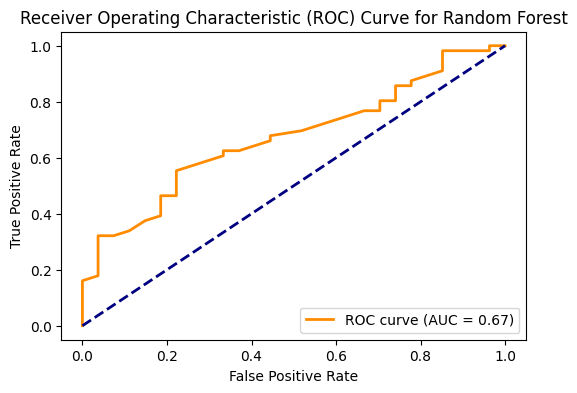

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_prob_rf = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


RANDOM FOREST(K-FOLD)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(n_estimators=150, random_state=0)

X_df = pd.DataFrame(X_Scaled, columns=X.columns)
y_df = pd.Series(y, name='Target')

classification_reports = []
accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_df), start=1):
    X_train, X_test = X_df.iloc[train_idx], X_df.iloc[test_idx]
    y_train, y_test = y_df.iloc[train_idx], y_df.iloc[test_idx]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    accuracies.append(accuracy)
    classification_reports.append(class_report)

    print(f"Fold {fold} Accuracy: {accuracy:.2f}")
    print(f"Fold {fold} Classification Report:")
    print(class_report)

mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Fold 1 Accuracy: 0.71
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        19
           1       0.83      0.80      0.81        65

    accuracy                           0.71        84
   macro avg       0.60      0.61      0.61        84
weighted avg       0.72      0.71      0.72        84

Fold 2 Accuracy: 0.78
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.35      0.47        23
           1       0.79      0.95      0.86        60

    accuracy                           0.78        83
   macro avg       0.76      0.65      0.67        83
weighted avg       0.77      0.78      0.75        83

Fold 3 Accuracy: 0.63
Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.33      0.37        27
           1       0.70      0.77      0.74        56

    accuracy              

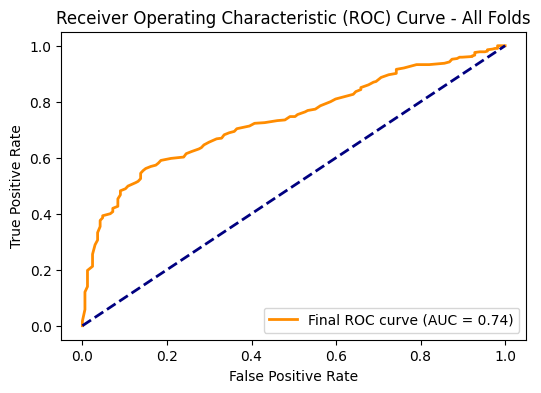

In [ ]:
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(n_estimators=150, random_state=0)

X_df = pd.DataFrame(X_Scaled, columns=X.columns)
y_df = pd.Series(y, name='Target')

# Initialize lists to store true labels and predicted probabilities for each fold
true_labels_list = []
predicted_probabilities_list = []

# Perform k-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_df), start=1):
    X_train, X_test = X_df.iloc[train_idx], X_df.iloc[test_idx]
    y_train, y_test = y_df.iloc[train_idx], y_df.iloc[test_idx]

    rf_model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

    # Append true labels and predicted probabilities for each fold
    true_labels_list.extend(y_test)
    predicted_probabilities_list.extend(y_prob_rf)

# Compute ROC curve and ROC area under the curve for all folds
fpr_all, tpr_all, thresholds_all = roc_curve(true_labels_list, predicted_probabilities_list)
roc_auc_all = auc(fpr_all, tpr_all)

# Plot the final ROC curve for all folds
plt.figure(figsize=(6, 4))
plt.plot(fpr_all, tpr_all, color='darkorange', lw=2, label=f'Final ROC curve (AUC = {roc_auc_all:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Folds')
plt.legend(loc='lower right')
plt.show()
